# **Building a Random Forest Model**

In [5]:
#IMPORT AND MOUNT

train_census = '/content/drive/MyDrive/MSBA_Assignments/CA03/train_census.csv'
test_census = '/content/drive/MyDrive/MSBA_Assignments/CA03/test_census.csv'
census_data = '/content/drive/MyDrive/MSBA_Assignments/CA03/census_data.csv'


import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [6]:
#convert to dataframes

traindf = pd.read_csv('/content/drive/MyDrive/MSBA_Assignments/CA03/train_census.csv')
testdf = pd.read_csv('/content/drive/MyDrive/MSBA_Assignments/CA03/test_census.csv')
datadf = pd.read_csv('/content/drive/MyDrive/MSBA_Assignments/CA03/census_data.csv')

datadf.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [7]:
#for training data
inputs = traindf.drop(['workclass_bin','flag','education_num_bin','y'],axis='columns')
y_train = traindf['y']


In [15]:
#make data numerical 
from sklearn.preprocessing import LabelEncoder
le_hours_per_week_bin = LabelEncoder()
le_occupation_bin = LabelEncoder()
le_msr_bin = LabelEncoder()
le_capital_gl_bin = LabelEncoder()
le_race_sex_bin = LabelEncoder()
le_education_bin = LabelEncoder()
le_age_bin = LabelEncoder()

In [16]:
#for training data
inputs['hours_per_week_bin_n'] = le_hours_per_week_bin.fit_transform(inputs['hours_per_week_bin'])
inputs['occupation_bin_n'] = le_occupation_bin.fit_transform(inputs['occupation_bin'])
inputs['msr_bin_n'] = le_msr_bin.fit_transform(inputs['msr_bin'])
inputs['capital_gl_bin_n'] = le_capital_gl_bin.fit_transform(inputs['capital_gl_bin'])
inputs['race_sex_bin_n'] = le_race_sex_bin.fit_transform(inputs['race_sex_bin'])
inputs['age_bin_n'] = le_education_bin.fit_transform(inputs['age_bin'])
inputs['education_bin_n'] = le_age_bin.fit_transform(inputs['education_bin'])

In [17]:
#for training data
x_train = inputs.drop(['hours_per_week_bin',	'occupation_bin',	'msr_bin',	'capital_gl_bin'	,'race_sex_bin'	,	'education_bin'	,	'age_bin'],axis='columns')


In [11]:
#for test data

test_inputs = testdf.drop(['workclass_bin','flag','education_num_bin','y'],axis='columns')
y_test = testdf['y']

In [12]:
#for test data
test_inputs['hours_per_week_bin_n'] = le_hours_per_week_bin.fit_transform(test_inputs['hours_per_week_bin'])
test_inputs['occupation_bin_n'] = le_occupation_bin.fit_transform(test_inputs['occupation_bin'])
test_inputs['msr_bin_n'] = le_msr_bin.fit_transform(test_inputs['msr_bin'])
test_inputs['capital_gl_bin_n'] = le_capital_gl_bin.fit_transform(test_inputs['capital_gl_bin'])
test_inputs['race_sex_bin_n'] = le_race_sex_bin.fit_transform(test_inputs['race_sex_bin'])
test_inputs['age_bin_n'] = le_education_bin.fit_transform(test_inputs['age_bin'])
test_inputs['education_bin_n'] = le_age_bin.fit_transform(test_inputs['education_bin'])

test_inputs.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin,hours_per_week_bin_n,occupation_bin_n,msr_bin_n,capital_gl_bin_n,race_sex_bin_n,age_bin_n,education_bin_n
0,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. Low,a. 0-25,1,1,0,0,1,0,0
1,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. Mid,d. 36-40 & 56-60,3,1,2,0,2,3,1
2,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. Mid,b. 26-30 & 71-100,1,3,2,0,2,1,1
3,b. 31-40,b. Mid - Low,c. High,c. > 0,b. Mid,b. Mid,e. 40-55,1,1,2,2,1,4,1
4,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. Mid,a. 0-25,0,1,0,0,1,0,1


In [13]:
#for test data
x_test = test_inputs.drop(['hours_per_week_bin',	'occupation_bin',	'msr_bin',	'capital_gl_bin'	,'race_sex_bin'	,	'education_bin'	,	'age_bin'],axis='columns')


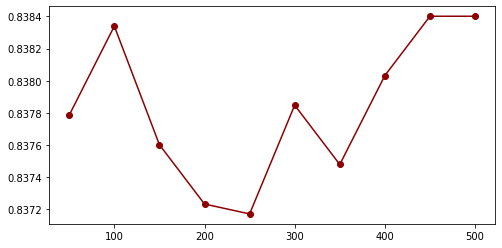

In [55]:
from sklearn.ensemble import RandomForestClassifier

results =[] #to add accuracy results to

max_estimator_options = [50, 100,150,200,250,300,350,400,450,500]
for trees in max_estimator_options:
  model = RandomForestClassifier(n_estimators=trees,random_state=101)

  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)# calculating accuracy 
  results.append(accuracy)
#plot the results
plt.figure(figsize=(8,4))
pd.Series(results, max_estimator_options).plot(color="darkred",marker="o")

1. **Write your observations about the Classifier’s behavior with respect to the
number of estimators**



*  There seems to be more than one optimal number of estimators. it seems that that the more estimators, the better, but that only happens after 350


2.  **Is there an optimal value of the estimator within the given range?**



> yes, seems to be 450 and 500





# **Building AdaBoost**

In [19]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


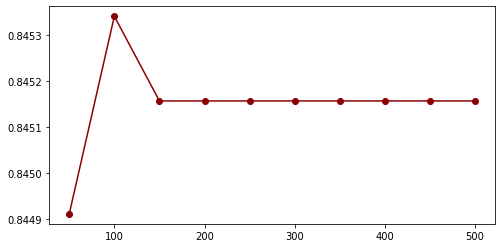

In [53]:
results_ada =[] #to add accuracy results to

max_estimator_options_ada = [50, 100,150,200,250,300,350,400,450,500]
for trees in max_estimator_options_ada:
  model_ada = AdaBoostClassifier(n_estimators=trees,random_state=101)
  model_ada.fit(x_train,y_train)
  y_pred_ada = model_ada.predict(x_test)
  accuracy_ada = np.mean(y_test == y_pred_ada)
  results_ada.append(accuracy_ada)
#plot the results

plt.figure(figsize=(8,4))
pd.Series(results_ada, max_estimator_options_ada).plot(color="darkred",marker="o")

1. **Write your observations about the Classifier’s behavior with respect to the
number of estimators**



*  It seems to level out after 150 which means after 150 there is no difference impact


2.  **Is there an optimal value of the estimator within the given range?**



> yes, seems to be 100





# **Gradient Boost**

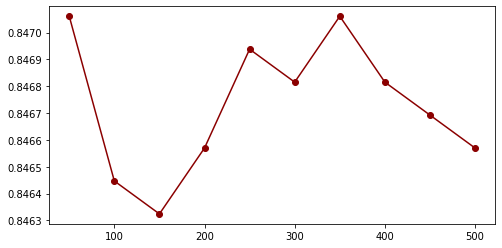

In [21]:
results_grad =[] #to add accuracy results to

max_estimator_options_grad = [50, 100,150,200,250,300,350,400,450,500]
for trees in max_estimator_options_grad:
  model_grad = GradientBoostingClassifier(n_estimators=trees,random_state=101)
  model_grad.fit(x_train,y_train)
  y_pred_grad = model_grad.predict(x_test)
  accuracy_grad = np.mean(y_test == y_pred_grad)# calculating accuracy 
  results_grad.append(accuracy_grad)
#plot the results

plt.figure(figsize=(8,4))
pd.Series(results_grad, max_estimator_options_grad).plot(color="darkred",marker="o")

1. **Write your observations about the Classifier’s behavior with respect to the
number of estimators**



*  it seems that after 350 estimators it becomes less effective


2.  **Is there an optimal value of the estimator within the given range?**



> yes, seems to be 50 and also maybe 350,its not too clear which one is higher





# **XGB**

In [22]:
from xgboost import XGBClassifier


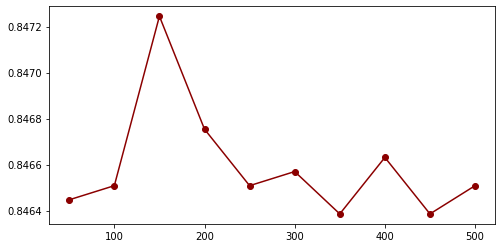

In [23]:
results_xgb =[] #to add accuracy results to

max_estimator_options_xgb = [50, 100,150,200,250,300,350,400,450,500]
for trees in max_estimator_options_xgb:
  model_xgb = XGBClassifier(n_estimators=trees,random_state=101)
  model_xgb.fit(x_train,y_train)
  y_pred_xgb = model_xgb.predict(x_test)
  accuracy_xgb = np.mean(y_test == y_pred_xgb)# calculating accuracy 
  results_xgb.append(accuracy_xgb)
#plot the results

plt.figure(figsize=(8,4))
pd.Series(results_xgb, max_estimator_options_xgb).plot(color="darkred",marker="o")

1. **Write your observations about the Classifier’s behavior with respect to the
number of estimators**



*  After it reaches the optimal value which is 150, it only gets worse


2.  **Is there an optimal value of the estimator within the given range?**



> yes, 150





# **Compare Performance**

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [41]:
random_forest_accuracy = accuracy_score(y_test, y_pred)
ada_accuracy = accuracy_score(y_test, y_pred_ada)
grad_accuracy = accuracy_score(y_test, y_pred_grad)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)






In [40]:
random_forest_auc = roc_auc_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_ada)
grad_auc = roc_auc_score(y_test, y_pred_grad)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

In [26]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve


In [46]:
data = {'Random Forest': [random_forest_accuracy, random_forest_auc],'AdaBoost': [ada_accuracy,ada_auc],'Gradient Boost': [grad_accuracy, grad_auc],'XGB': [xgb_accuracy,xgb_auc]}

In [49]:
performance_table = pd.DataFrame(data=data, index=['Accuracy', 'Auc'])

In [50]:
performance_table

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838401,0.845157,0.846570,0.846508
Auc,0.745687,0.746518,0.759117,0.758448


In [56]:
print(f"The common hyperparameters are n_estimators as {max_estimator_options} and random_state as {101} ")

The common hyperparameters are n_estimators as [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] and random_state as 101 
